In [90]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# **Read CSV File**

In [130]:
train = pd.read_csv("C:/Users/User/Downloads/DS Tech Task/DS Tech Task/train.csv")
test = pd.read_csv("C:/Users/User/Downloads/DS Tech Task/DS Tech Task/test.csv")

In [131]:
#train = pd.read_csv("train_data_excluding_100.csv") #First, train on a training dataset and observe how well it predicts, which is why divided.
#test= pd.read_csv("random_sample_100.csv")  

In [132]:
train.head(5)

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference
0,M,18.0,"1,674",52.9,790,655,851
1,M,18.0,"1,678",55.8,825,654,880
2,M,23.0,"1,790",57.5,800,650,870
3,F,37.0,"1,626",66.3,962,820,997
4,M,24.0,"1,722",69.2,948,785,937


In [133]:
train.tail(5)

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference
5132,M,32.0,"1,756",65.4,896,820,930
5133,F,22.0,"1,619",52.7,838,734,926
5134,M,27.0,"1,760",75.0,930,845,983
5135,M,56.0,"1,562",62.2,890,866,887
5136,M,38.0,"1,732",78.7,990,872,984


In [134]:
test.head(5)

,gender,age,height,weight
0,M,27.0,"1,729",74.7
1,M,25.0,"1,645",58.6
2,M,28.0,"1,786",75.2
3,M,19.0,"1,686",60.8
4,M,24.0,"1,764",68.3


# **EDA (Exploratory Data Analysis)**

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5136 non-null   object 
 1   age                  5136 non-null   float64
 2   height               5135 non-null   object 
 3   weight               5130 non-null   float64
 4   bust_circumference   5133 non-null   object 
 5   waist_circumference  5133 non-null   object 
 6   hip_circumference    5133 non-null   object 
dtypes: float64(2), object(5)
memory usage: 281.1+ KB


In [136]:
train.duplicated().sum()

np.int64(4)

In [137]:
test.duplicated().sum()

np.int64(0)

In [138]:
train = train.drop_duplicates()
print(f"Number of duplicates after removal: {train.duplicated().sum()}")

Number of duplicates after removal: 0


In [139]:
train.isnull().sum()

gender                 1
age                    1
height                 2
weight                 7
bust_circumference     4
waist_circumference    4
hip_circumference      4
dtype: int64

In [140]:
train.isnull().sum()/len(train)*100

gender                 0.019482
age                    0.019482
height                 0.038964
weight                 0.136372
bust_circumference     0.077927
waist_circumference    0.077927
hip_circumference      0.077927
dtype: float64

In [141]:
print("Before Drop :", train.shape)
train = train.dropna()
print("After Drop :", train.shape)

Before Drop : (5133, 7)
After Drop : (5125, 7)


In [142]:
test.isnull().sum()

gender    0
age       0
height    0
weight    1
dtype: int64

In [143]:
test.isnull().sum()/len(train)*100

gender    0.000000
age       0.000000
height    0.000000
weight    0.019512
dtype: float64

In [144]:
def clean_numeric(df, columns):
    for col in columns:
        df[col] = df[col].astype(str).str.replace(',', '').str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')

numeric_cols = ['age', 'height', 'weight', 'bust_circumference', 'waist_circumference', 'hip_circumference']
clean_numeric(train, numeric_cols)

In [145]:
train.describe()

,age,height,weight,bust_circumference,waist_circumference,hip_circumference
count,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000
mean,31.586537,1654.128195,63.861620,896.633171,785.856780,940.514927
std,14.431220,89.774549,12.640739,85.423981,101.298622,62.145278
min,15.000000,1354.000000,36.800000,671.000000,562.000000,776.000000
25%,19.000000,1584.000000,54.600000,834.000000,708.000000,898.000000
50%,28.000000,1653.000000,61.700000,890.000000,775.000000,935.000000
75%,40.000000,1723.000000,71.500000,951.000000,853.000000,976.000000
max,69.000000,1915.000000,139.200000,1277.000000,1249.000000,1312.000000


## 

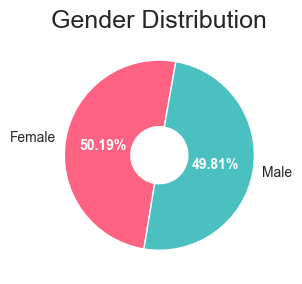

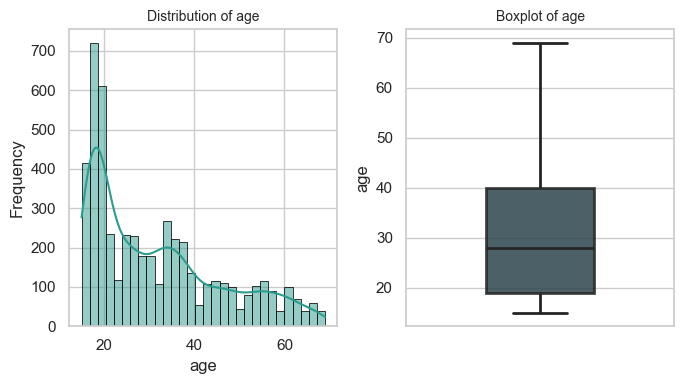

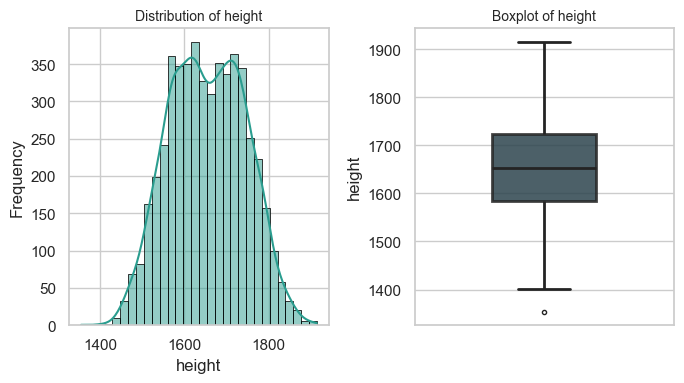

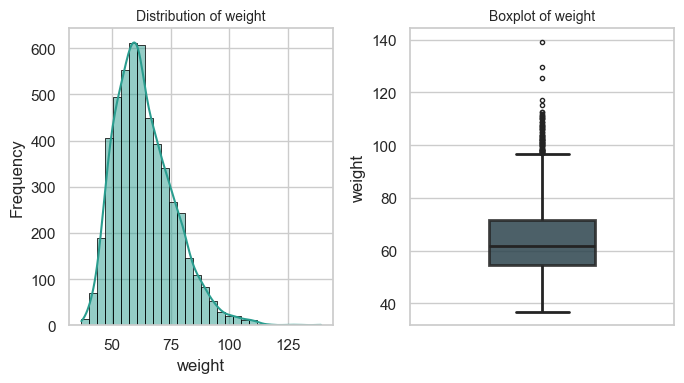

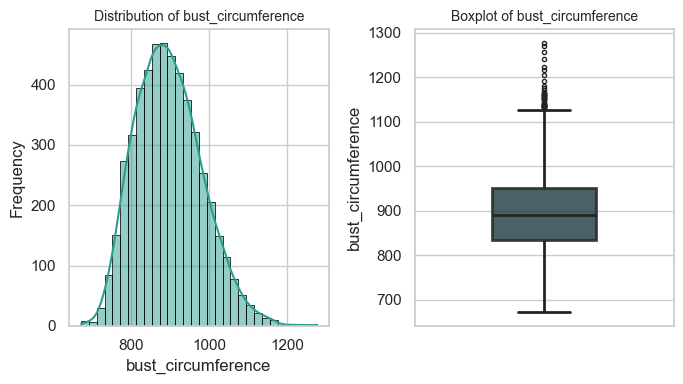

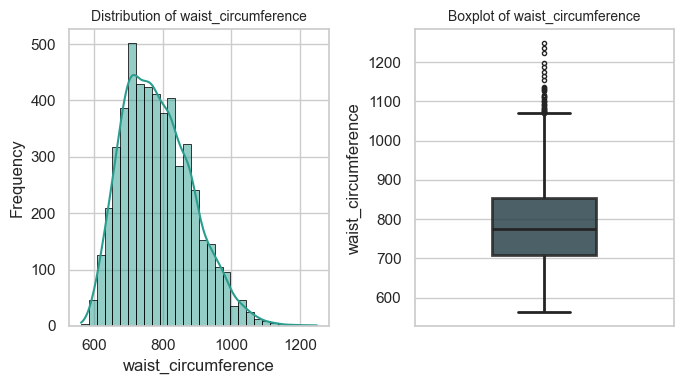

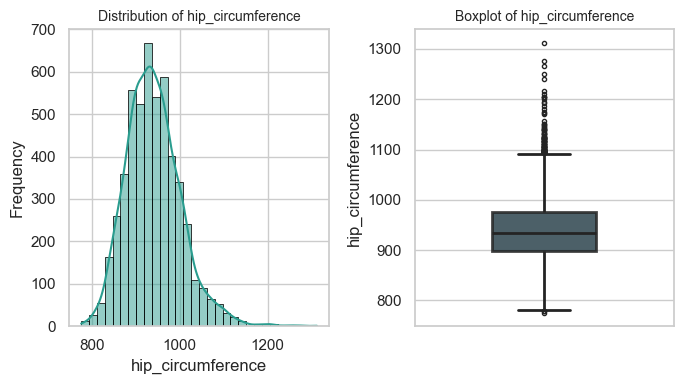

In [146]:
import matplotlib.pyplot as plt

# Gender distribution with label mapping
gender_map = {'F': 'Female', 'M': 'Male'}
gender_counts = train['gender'].map(gender_map).value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = ['#FF6384', '#4BC0C0'] 

fig, ax = plt.subplots(figsize=(5, 3), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.2f%%',
    startangle=80,
    wedgeprops=dict(width=0.7),
    colors=colors
)


plt.setp(autotexts, size=10, weight="bold", color="white")
plt.setp(texts, size=10)
plt.title("Gender Distribution", fontsize=18)
plt.tight_layout()
plt.show()


def univariate_analysis(df, column_name):
    plt.figure(figsize=(7, 4))
    unique_vals = df[column_name].nunique()
    col_data = df[column_name].dropna()

    sns.set_style("whitegrid")

    plt.subplot(1, 2, 1)
    if unique_vals <= 30:
        palette = sns.color_palette("pastel")
        sns.countplot(data=df, x=column_name, palette=palette, order=df[column_name].value_counts().index)
        plt.title(f'Count Plot of {column_name} (Unique: {unique_vals})', fontsize=14)
        plt.xticks(rotation=45)
    else:
        sns.histplot(col_data, kde=True, color='#2a9d8f', edgecolor='black', bins=30)
        plt.title(f'Distribution of {column_name}', fontsize=10)

    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(
        y=col_data,
        color='#264653', 
        linewidth=2,
        fliersize=3,
        width=0.4,
        boxprops=dict(alpha=0.85)
    )
    plt.title(f'Boxplot of {column_name}', fontsize=10)
    plt.ylabel(column_name)

    plt.tight_layout()
    plt.show()

numeric_features = ['age', 'height', 'weight', 'bust_circumference', 'waist_circumference', 'hip_circumference']

for col in numeric_features:
    univariate_analysis(train, col)


**According to gender columns, 49.81% of respondents are men and 50.19% are women.  2. There are outliers in the weight, waist, bust, and hip columns, and one outlier is visible in the height columns.  3. The distribution of weight data is not uniform, and height may indicate demographic subgroups. Age suggests data that is balanced.**

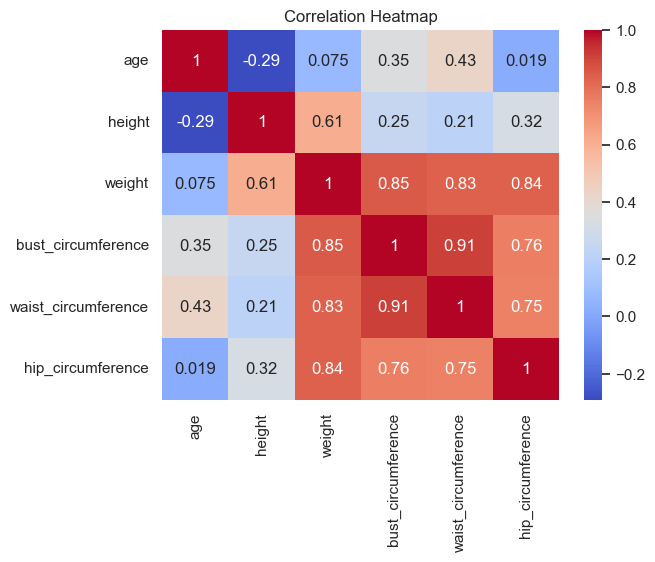

C:\Users\User\AppData\Local\Temp\ipykernel_3376\285455427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y=col, data=train, palette='pastel')


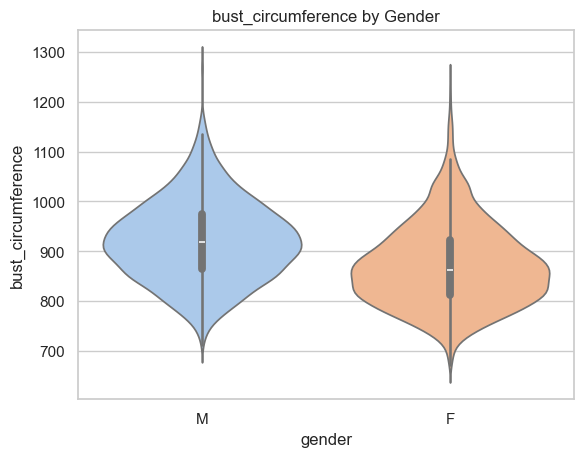

C:\Users\User\AppData\Local\Temp\ipykernel_3376\285455427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y=col, data=train, palette='pastel')


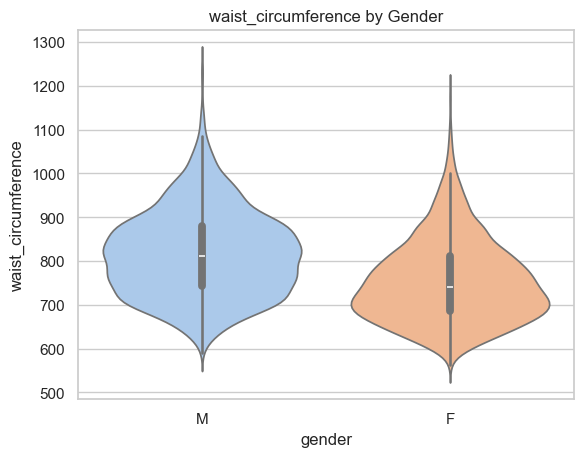

C:\Users\User\AppData\Local\Temp\ipykernel_3376\285455427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y=col, data=train, palette='pastel')


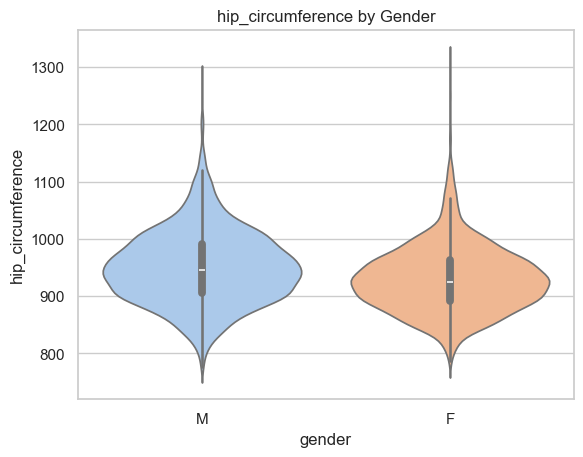

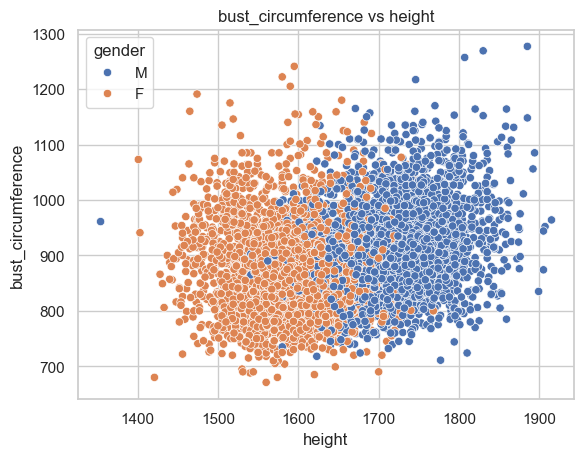

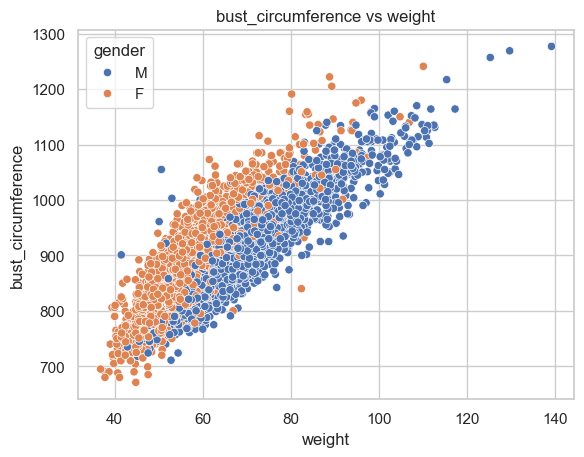

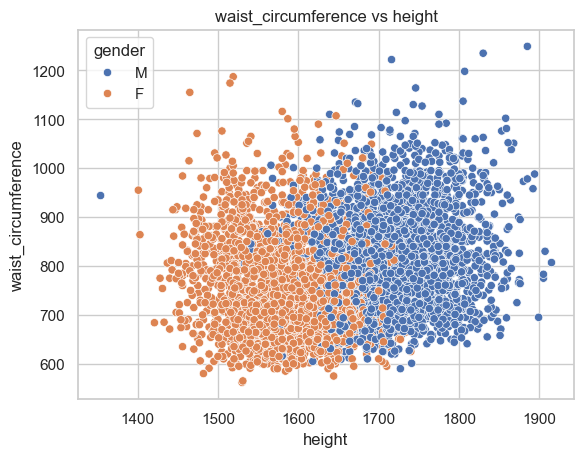

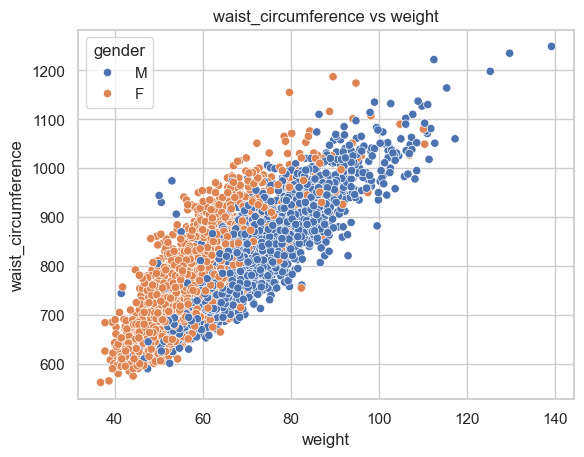

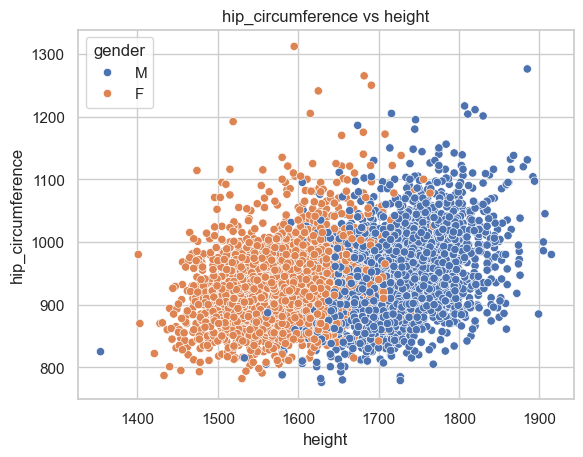

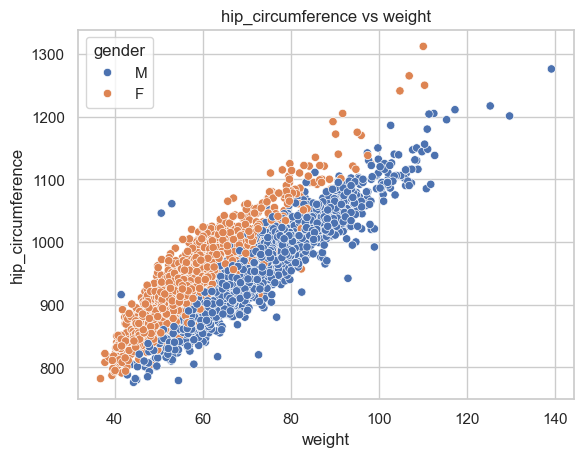

In [147]:
sns.heatmap(train[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


for col in ['bust_circumference', 'waist_circumference', 'hip_circumference']:
    sns.violinplot(x='gender', y=col, data=train, palette='pastel')
    plt.title(f'{col} by Gender')
    plt.show()


for target in ['bust_circumference', 'waist_circumference', 'hip_circumference']:
    for feature in ['height', 'weight']:
        sns.scatterplot(data=train, x=feature, y=target, hue='gender')
        plt.title(f'{target} vs {feature}')
        plt.show()


**weight is substantially connected to body circumferences; bust and waist circumferences are highly associated; height has a moderately favorable relationship with weight; and age has modest correlations with body measurements**

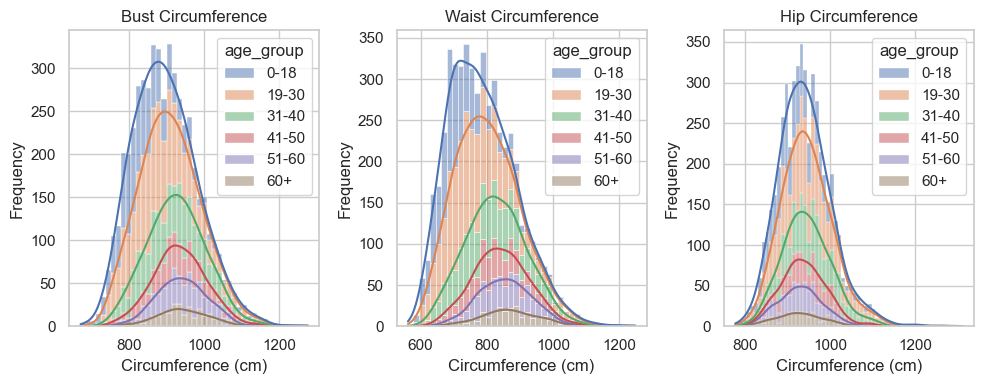

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

bins = [0, 18, 30, 40, 50, 60, 100]  
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
train['age_group'] = pd.cut(train['age'], bins=bins, labels=labels)


fig, axes = plt.subplots(1, 3, figsize=(10, 4))


sns.histplot(data=train, x="bust_circumference", hue="age_group", kde=True, ax=axes[0], multiple="stack")
axes[0].set_title('Bust Circumference')

sns.histplot(data=train, x="waist_circumference", hue="age_group", kde=True, ax=axes[1], multiple="stack")
axes[1].set_title('Waist Circumference')

sns.histplot(data=train, x="hip_circumference", hue="age_group", kde=True, ax=axes[2], multiple="stack")
axes[2].set_title('Hip Circumference')

for ax in axes:
    ax.set_xlabel('Circumference (cm)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**The Above plots show that the 0-18 age range has the highest frequency, with bust, waist, and hip circumferences peaking between 850 and 900 cm.  The 19-30 age group follows closely, with slightly bigger average sizes (~900-950 cm).  Circumference variability rises in older age groups (41+), with flatter distributions and values of up to 1200 cm.  These developments emphasize the need of designing models for age-specific body form patterns.**

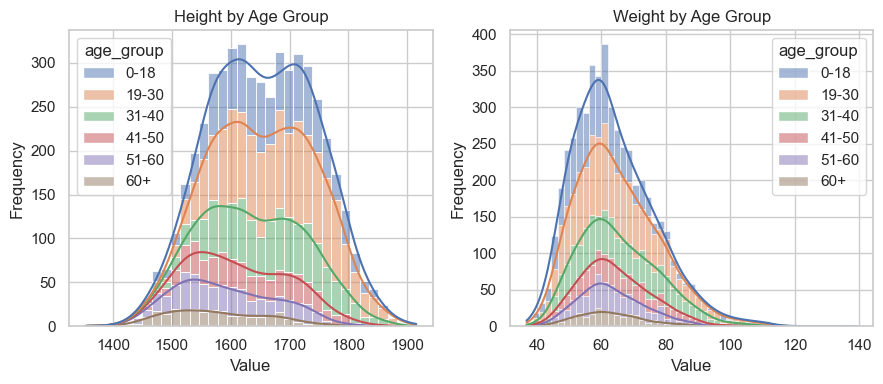

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

bins = [0, 18, 30, 40, 50, 60, 100]  
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
train['age_group'] = pd.cut(train['age'], bins=bins, labels=labels)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.histplot(data=train, x="height", hue="age_group", kde=True, ax=axes[0], multiple="stack")
axes[0].set_title('Height by Age Group')

sns.histplot(data=train, x="weight", hue="age_group", kde=True, ax=axes[1], multiple="stack")
axes[1].set_title('Weight by Age Group')

for ax in axes:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Height peaks around 165-175 for ages 19-40, whereas 0-18 has the highest frequency (>300).Weight for children aged 0 to 18 is 50-55 kg, with adults weighing 55-70 kg and some senior people weighing more than 100 kg.Both height and weight distributions widen with age, particularly in groups 41 and up, indicating natural variability.These patterns are crucial for correct modeling of age-related body characteristics.**

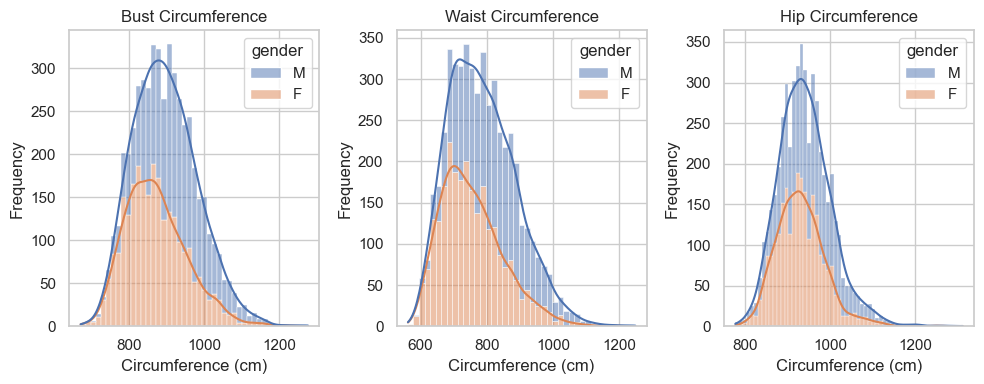

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

sns.histplot(data=train, x="bust_circumference", hue="gender", kde=True, ax=axes[0], multiple="stack")
axes[0].set_title('Bust Circumference')

sns.histplot(data=train, x="waist_circumference", hue="gender", kde=True, ax=axes[1], multiple="stack")
axes[1].set_title('Waist Circumference')

sns.histplot(data=train, x="hip_circumference", hue="gender", kde=True, ax=axes[2], multiple="stack")
axes[2].set_title('Hip Circumference')

for ax in axes:
    ax.set_xlabel('Circumference (cm)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Males typically have larger bust and waist circumferences than females, with greater fluctuation in these measurements.  Hip circumferences are more comparable between genders, however males continue to have somewhat greater measures on average.  These distributions demonstrate the typical anthropometric discrepancies between male and female populations in this dataset.**

C:\Users\User\AppData\Local\Temp\ipykernel_3376\1366771443.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y=col, data=train, palette=palette, showfliers=True)
C:\Users\User\AppData\Local\Temp\ipykernel_3376\1366771443.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y=col, data=train, palette=palette, showfliers=True)
C:\Users\User\AppData\Local\Temp\ipykernel_3376\1366771443.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y=col, data=train, palette=palette, showfliers=True)
C:\User

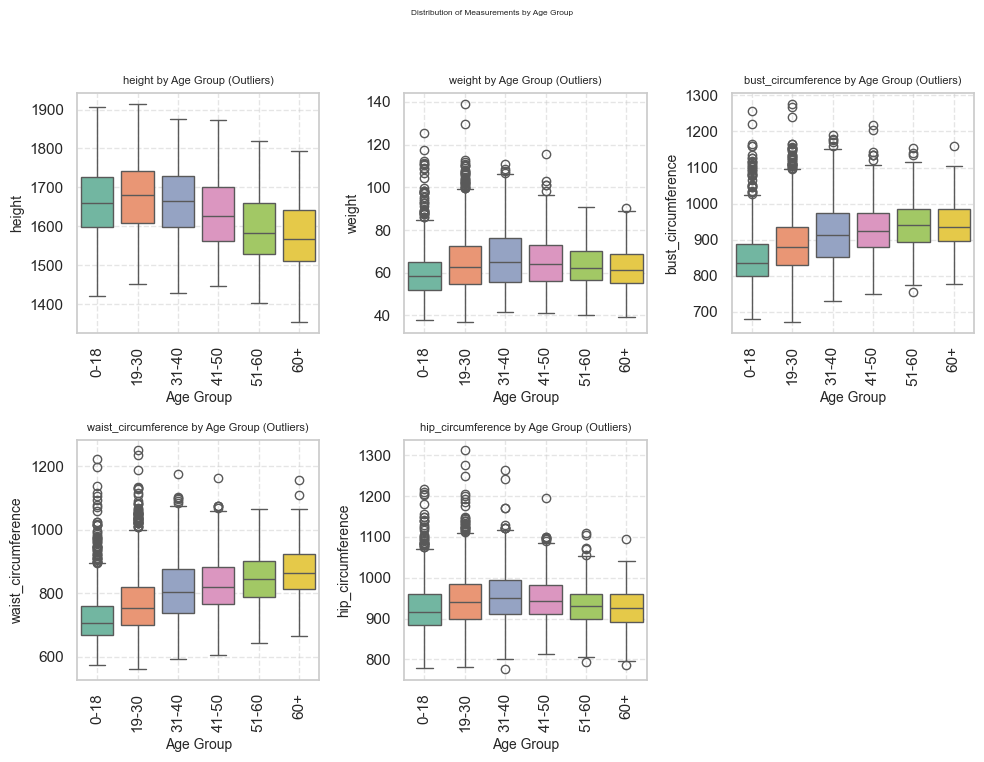

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age_bins = pd.cut(train['age'],

bins = [0, 18, 30, 40, 50, 60, 100], 
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+'])
train['age_group'] = age_bins

numeric_cols = ['height', 'weight', 'bust_circumference', 'waist_circumference', 'hip_circumference']

sns.set(style="whitegrid")
palette = sns.color_palette("Set2", len(train['age_group'].unique()))

plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='age_group', y=col, data=train, palette=palette, showfliers=True)
    plt.title(f'{col} by Age Group (Outliers)', fontsize=8)
    plt.xlabel('Age Group', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Distribution of Measurements by Age Group", fontsize=6)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Those aged between 0 and 30 have the largest outliers, followed by those aged 31 to 40, 41 to 50, and 51 to 60. However, there are relatively few outliers above 60**

In [152]:
train.loc[train['age'] <= 18, 'age'] = 0
train.loc[(train['age'] > 18) & (train['age'] <= 25), 'age'] = 1
train.loc[(train['age'] > 25) & (train['age'] <= 36), 'age'] = 2
train.loc[(train['age'] > 36) & (train['age'] <= 62), 'age'] = 3
train.loc[train['age'] > 62, 'age'] = 4


In [153]:
sex_mapping = {"M": 0, "F": 1}
train['gender'] = train['gender'].map(sex_mapping)

In [154]:
train.head()

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference,age_group
0,0,0.0,1674,52.9,790,655,851,0-18
1,0,0.0,1678,55.8,825,654,880,0-18
2,0,1.0,1790,57.5,800,650,870,19-30
3,1,3.0,1626,66.3,962,820,997,31-40
4,0,1.0,1722,69.2,948,785,937,19-30


# **Feature Engineering**

In [155]:
train['BMI'] = train['weight'] / ((train['height'] / 1000) ** 2)


# **Outliers Detection**

**Outliers are actual, valid deviations in human body shape.  Since the goal is to predict for various individuals and Random Forests are robust to outliers, it is preferable to use them for a realistic and inclusive model. This is why I commented out the outliers cell and keep only visualization**

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", context="notebook")

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    return df

before_color = "#FFD700"  
after_color = "#7FFFD4"  

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(6, 4))

    sns.boxplot(y=train[col], ax=axes[0], color=before_color, width=0.4, linewidth=2, fliersize=3)
    axes[0].set_title(f'{col}\nBefore Capping', fontsize=10, fontweight='semibold')
    axes[0].tick_params(axis='y', labelsize=10)
    axes[0].set_ylabel("")
    axes[0].set_xlabel("")

    capped_data = cap_outliers(train.copy(), col)
    sns.boxplot(y=capped_data[col], ax=axes[1], color=after_color, width=0.4, linewidth=2, fliersize=3)
    axes[1].set_title(f'{col}\nAfter Capping', fontsize=10, fontweight='semibold')
    axes[1].tick_params(axis='y', labelsize=10)
    axes[1].set_ylabel("")
    axes[1].set_xlabel("")

    fig.suptitle(f'Outlier Capping Effect on "{col}"', fontsize=13, fontweight='bold', y=1.05)

    for ax in axes:
        sns.despine(ax=ax)

    plt.tight_layout()
    plt.show()


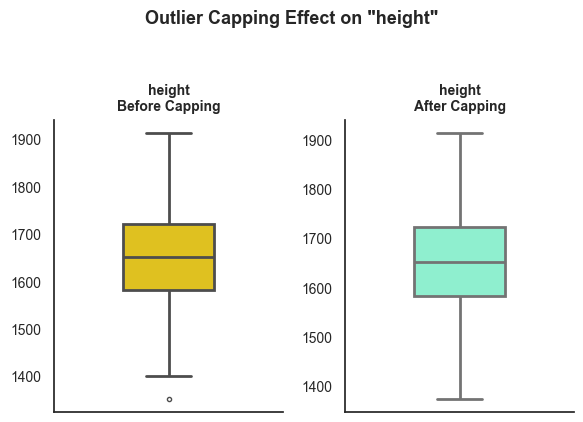

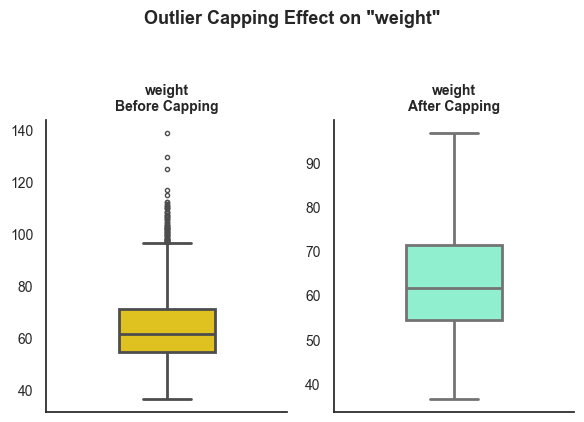

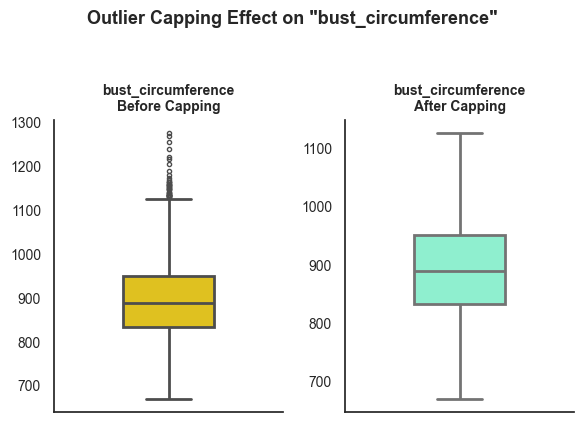

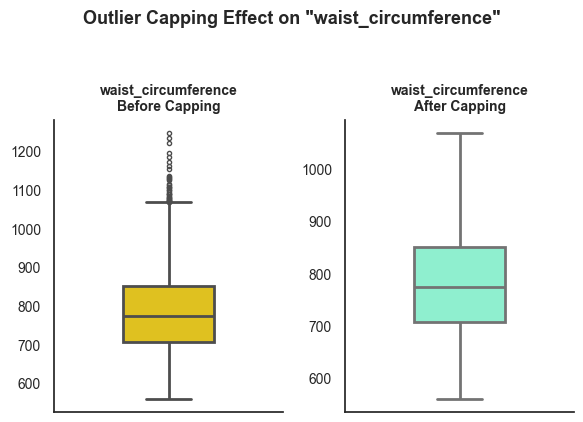

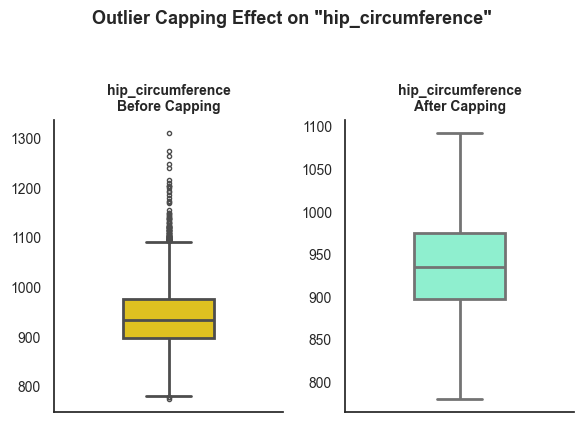

In [118]:
train.head()

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference,age_group,BMI
0,0,0.0,1674,52.9,790,655,851,0-18,18.877512
1,0,0.0,1678,55.8,825,654,880,0-18,19.817565
2,0,1.0,1790,57.5,800,650,870,19-30,17.945757
3,1,3.0,1626,66.3,962,820,997,31-40,25.076819
4,0,1.0,1722,69.2,948,785,937,19-30,23.336719


In [119]:
feature = ["height", "weight","BMI"]
targets = ["bust_circumference", "waist_circumference", "hip_circumference"]

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[feature] = scaler.fit_transform(train[feature])


In [121]:
train.head()

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference,age_group,BMI
0,0,0.0,0.221374,-0.867251,790,655,851,0-18,-1.211825
1,0,0.0,0.265934,-0.637811,825,654,880,0-18,-0.950944
2,0,1.0,1.513626,-0.503312,800,650,870,19-30,-1.470403
3,1,3.0,-0.313351,0.192917,962,820,997,31-40,0.508591
4,0,1.0,0.756099,0.422357,948,785,937,19-30,0.025683


In [122]:
train.drop(columns=['age_group'], inplace=True)


In [123]:
train.head()

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference,BMI
0,0,0.0,0.221374,-0.867251,790,655,851,-1.211825
1,0,0.0,0.265934,-0.637811,825,654,880,-0.950944
2,0,1.0,1.513626,-0.503312,800,650,870,-1.470403
3,1,3.0,-0.313351,0.192917,962,820,997,0.508591
4,0,1.0,0.756099,0.422357,948,785,937,0.025683


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X= train.drop(columns=targets)
y = train[targets]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [125]:
X.head()

,gender,age,height,weight,BMI
0,0,0.0,0.221374,-0.867251,-1.211825
1,0,0.0,0.265934,-0.637811,-0.950944
2,0,1.0,1.513626,-0.503312,-1.470403
3,1,3.0,-0.313351,0.192917,0.508591
4,0,1.0,0.756099,0.422357,0.025683


# **Model Building**

In [126]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

def print_regression_report(y_true, y_pred, labels):
    print("\n Regression Report:")
    for i, label in enumerate(labels):
        print(f"\n {label}:")
        print(f"   MAE:  {mean_absolute_error(y_true[label], y_pred[:, i]):.2f}")
        print(f"   RMSE: {np.sqrt(mean_squared_error(y_true[label], y_pred[:, i])):.2f}")
        print(f"   R²:   {r2_score(y_true[label], y_pred[:, i]):.2f}")

print_regression_report(y_test, y_pred, targets)



 Regression Report:

 bust_circumference:
   MAE:  25.07
   RMSE: 32.17
   R²:   0.85

 waist_circumference:
   MAE:  27.33
   RMSE: 35.01
   R²:   0.88

 hip_circumference:
   MAE:  19.31
   RMSE: 25.23
   R²:   0.84


# **Model Evaluation And Fine Tuning**

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5]  
}

best_models = {}

print("Training models with GridSearchCV...")

for target in targets:
    model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train[target])
    best_model = grid_search.best_estimator_
    best_models[target] = best_model

    val_preds = best_model.predict(X_train)
    mse = mean_squared_error(y_train[target], val_preds)
    print(f"\n{target} - Best Params: {grid_search.best_params_}")
    print(f"   MAE: {mean_absolute_error(y_train[target], val_preds):.2f}")
    print(f"   RMSE: {np.sqrt(mse):.2f}")
    print(f"   R²: {r2_score(y_train[target], val_preds):.2f}")

raw_input = {
    'gender': 'F',
    'age': 45,
    'height': 1700, 
    'weight': 72.7   
}

if raw_input['age'] <= 18:
    age_bin = 0
elif raw_input['age'] <= 25:
    age_bin = 1
elif raw_input['age'] <= 36:
    age_bin = 2
elif raw_input['age'] <= 62:
    age_bin = 3
else:
    age_bin = 4


gender_encoded = sex_mapping[raw_input['gender']]

bmi_val = raw_input['weight'] / ((raw_input['height'] / 1000) ** 2)

new_person = pd.DataFrame([{
    'gender': gender_encoded,
    'age': age_bin,
    'height': raw_input['height'],
    'weight': raw_input['weight'],
    'BMI': bmi_val
}])

new_person[['height', 'weight', 'BMI']] = scaler.transform(new_person[['height', 'weight', 'BMI']])

new_prediction = {
    target: best_models[target].predict(new_person)[0]
    for target in targets
}

print(f"\n Prediction for: {raw_input}")
for name, value in new_prediction.items():
    print(f"   {name}: {value:.2f} ")


Training models with GridSearchCV...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

bust_circumference - Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
   MAE: 12.28
   RMSE: 15.98
   R²: 0.97
Fitting 3 folds for each of 8 candidates, totalling 24 fits

waist_circumference - Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
   MAE: 13.05
   RMSE: 17.23
   R²: 0.97
Fitting 3 folds for each of 8 candidates, totalling 24 fits

hip_circumference - Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
   MAE: 9.25
   RMSE: 12.22
   R²: 0.96

 Prediction for: {'gender': 'F', 'age': 45, 'height': 1700, 'weight': 72.7}
   bust_circumference: 949.08 
   waist_circumference: 852.70 
   hip_circumference: 1024.83 


In [128]:
raw_input = {
    'gender': 'M',
    'age': 65,
    'height': 1685,  
    'weight': 73.4   
}

if raw_input['age'] <= 18:
    age_bin = 0
elif raw_input['age'] <= 25:
    age_bin = 1
elif raw_input['age'] <= 36:
    age_bin = 2
elif raw_input['age'] <= 62:
    age_bin = 3
else:
    age_bin = 4

gender_encoded = sex_mapping[raw_input['gender']]

bmi_val = raw_input['weight'] / ((raw_input['height'] / 1000) ** 2)

new_person = pd.DataFrame([{
    'gender': gender_encoded,
    'age': age_bin,
    'height': raw_input['height'],
    'weight': raw_input['weight'],
    'BMI': bmi_val
}])


new_person[['height', 'weight', 'BMI']] = scaler.transform(new_person[['height', 'weight', 'BMI']])


new_prediction = {
    target: best_models[target].predict(new_person)[0]
    for target in targets
}

print(f"\n Prediction for: {raw_input}")
for name, value in new_prediction.items():
    print(f"   {name}: {value:.2f} ")



 Prediction for: {'gender': 'M', 'age': 65, 'height': 1685, 'weight': 73.4}
   bust_circumference: 950.53 
   waist_circumference: 873.54 
   hip_circumference: 958.69 


## **Prediction on Test.csv**

In [129]:
import pandas as pd


df = pd.read_csv("C:/Users/User/Downloads/DS Tech Task/DS Tech Task/test.csv")
df['weight'].fillna(df['weight'].median(), inplace=True)
df['height'] = pd.to_numeric(df['height'].astype(str).str.replace(",", "."), errors='coerce')
df['weight'] = pd.to_numeric(df['weight'].astype(str).str.replace(",", "."), errors='coerce')

predictions = []
for index, row in df.iterrows():
    
    if row['age'] <= 18:
        age_bin = 0
    elif row['age'] <= 25:
        age_bin = 1
    elif row['age'] <= 36:
        age_bin = 2
    elif row['age'] <= 62:
        age_bin = 3
    else:
        age_bin = 4

 
    gender_encoded = sex_mapping[raw_input['gender']]

    bmi_val = row['weight'] / ((row['height'] / 1000) ** 2)

    new_person = pd.DataFrame([{
        'gender': gender_encoded,
        'age': age_bin,
        'height': row['height'],
        'weight': row['weight'],
        'BMI': bmi_val
    }])

    new_person[['height', 'weight', 'BMI']] = scaler.transform(new_person[['height', 'weight', 'BMI']])

    new_prediction = {
        target: best_models[target].predict(new_person)[0]
        for target in targets
    }

    predictions.append(new_prediction)

df_predictions = pd.DataFrame(predictions)
df_output = pd.concat([df, df_predictions], axis=1)
df_output.to_csv('predicted.csv', index=False)
print("Predictions file saved.")

C:\Users\User\AppData\Local\Temp\ipykernel_3376\1563312770.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weight'].fillna(df['weight'].median(), inplace=True)


Predictions file saved.
